In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = '/content/drive/My Drive/auto-mpg (1).csv'
df = pd.read_csv(file_path)
print(df.head())


    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [ ]:
# Clean data
df = df.replace("?", np.nan)
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df.dropna(inplace=True)

In [ ]:
# Simulate ride-related features
np.random.seed(42)
df['distance_km'] = np.random.uniform(5, 50, size=len(df))
df['waiting_time'] = np.random.randint(0, 15, size=len(df))
df['fuel_cost_per_km'] = (3 / df['mpg']) * 0.621  # assume $3/gallon


In [ ]:
# Calculate fare using a formula
df['fare'] = (
    40 +  # base fare
    df['distance_km'] * df['fuel_cost_per_km'] +
    df['waiting_time'] * 2  # $2 per minute wait
)

In [ ]:
# Prepare features and target
features = ['displacement', 'horsepower', 'weight', 'acceleration', 'distance_km', 'waiting_time']
X = df[features]
y = df['fare']

In [ ]:
# Train linear regression model
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# Print coefficients
print("🚖 Dynamic Pricing Model Coefficients:")
for feat, coef in zip(features, model.coef_):
    print(f"{feat}: {coef:.2f}")
print("Intercept:", model.intercept_)

🚖 Dynamic Pricing Model Coefficients:
displacement: -0.00
horsepower: 0.01
weight: 0.00
acceleration: 0.00
distance_km: 0.09
waiting_time: 2.01
Intercept: 37.4705284197458


In [ ]:
# Optional: Predict fare for first 5 records
predicted_fares = model.predict(X[:5])
print("\nSample Predicted Fares:\n", predicted_fares)


Sample Predicted Fares:
 [44.41458803 44.99667059 55.94583401 57.44685983 53.67129112]


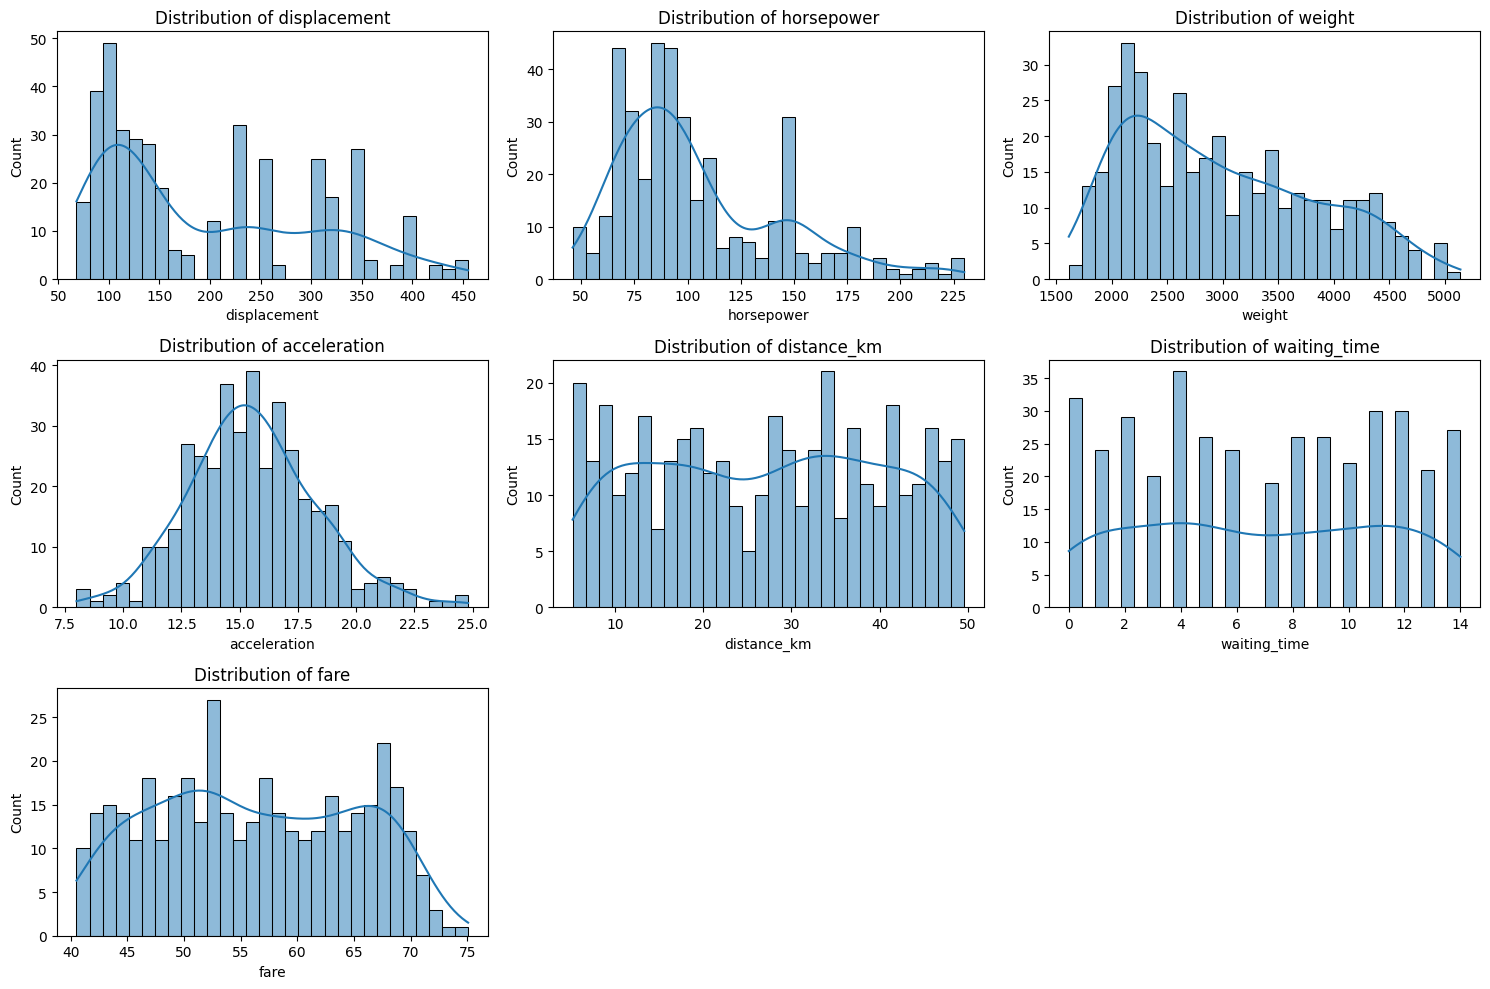

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data Distribution: Histogram of numerical features
numeric_features = ['displacement', 'horsepower', 'weight', 'acceleration', 'distance_km', 'waiting_time', 'fare']

plt.figure(figsize=(15,10))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


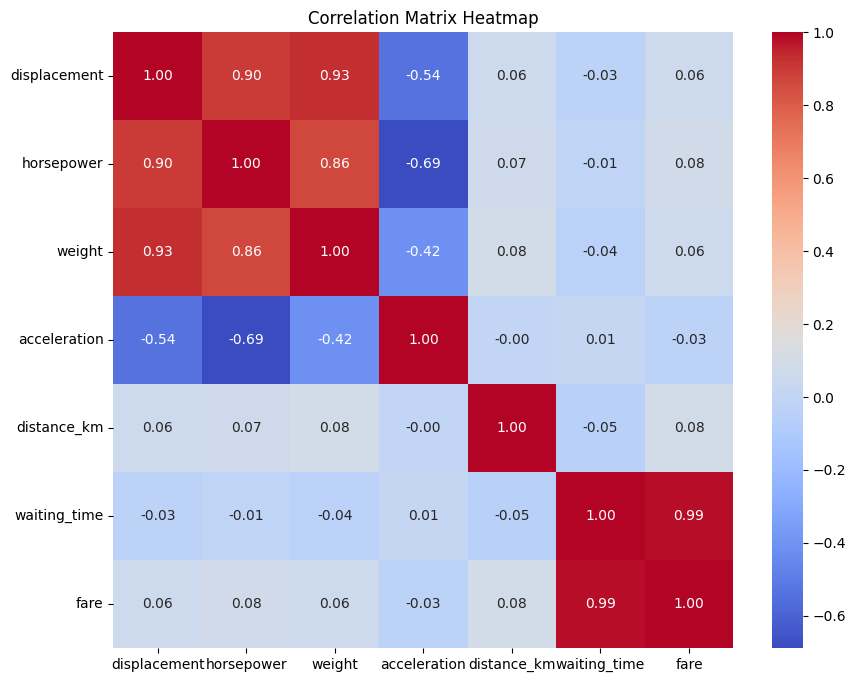

In [18]:
# Correlation Matrix and Heatmap
plt.figure(figsize=(10, 8))
corr_matrix = df[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

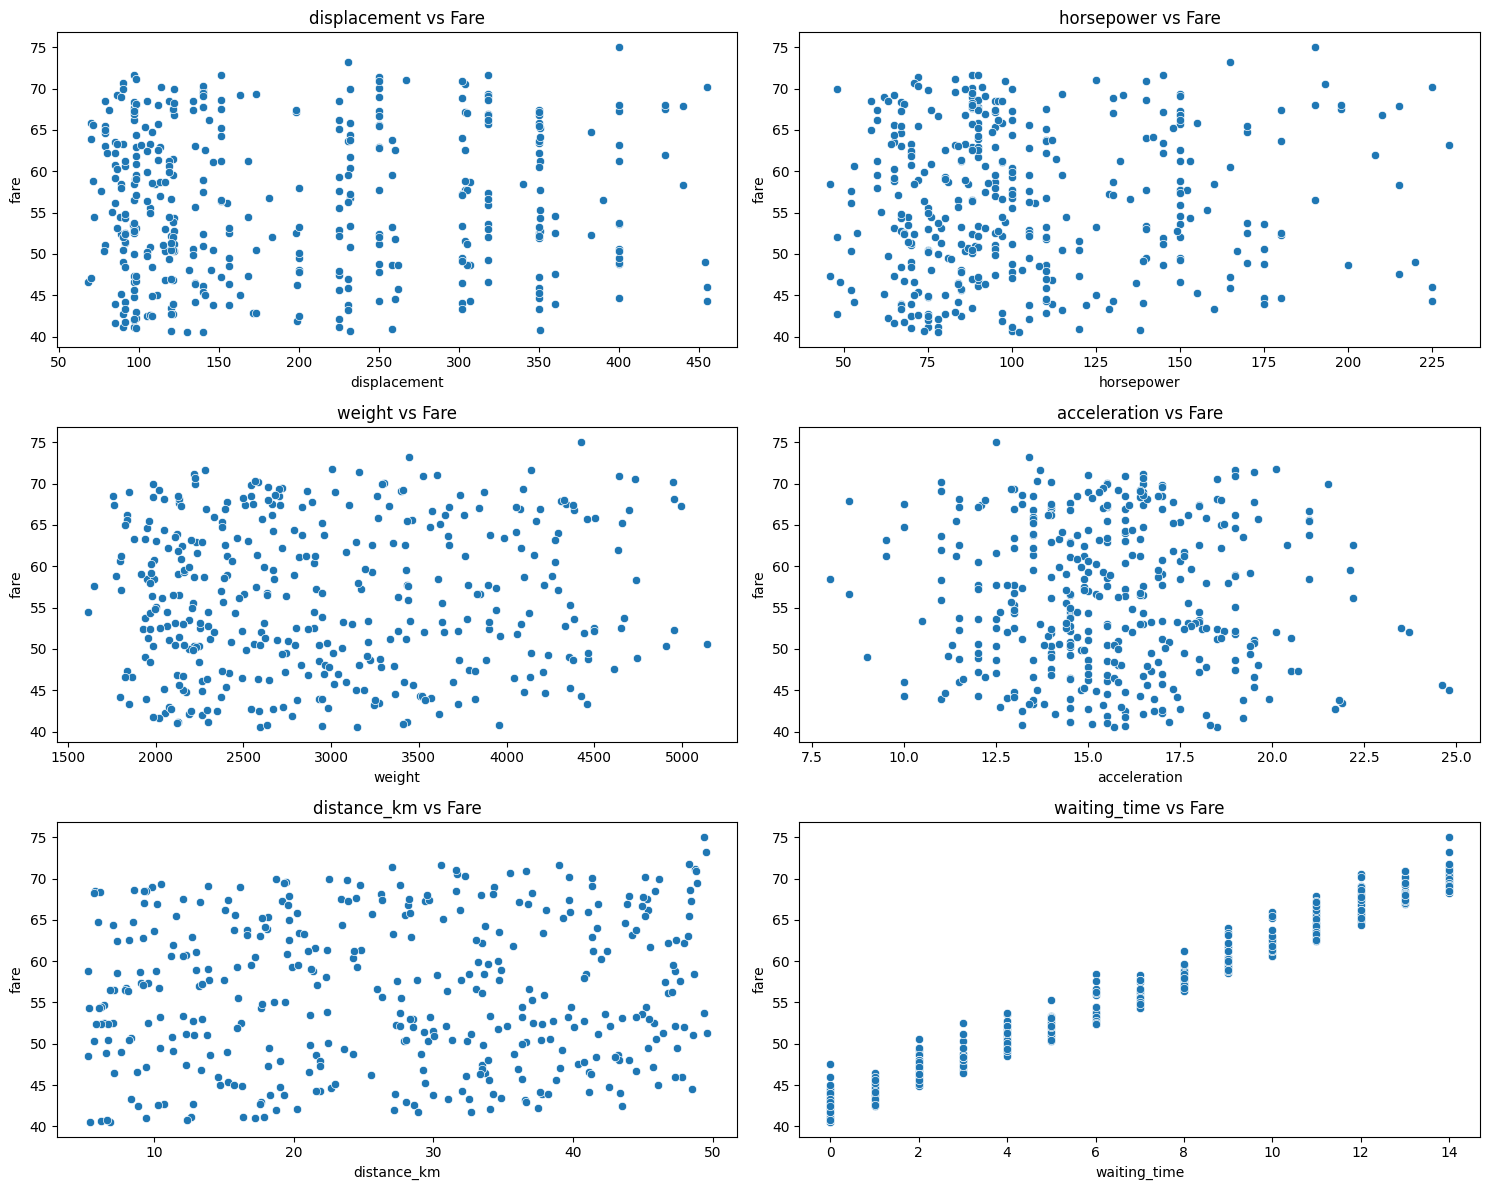

In [19]:
# Feature vs Fare Scatter Plots
plt.figure(figsize=(15, 12))
for i, feature in enumerate(numeric_features[:-1]):  # exclude 'fare' itself
    plt.subplot(3, 2, i+1)
    sns.scatterplot(x=df[feature], y=df['fare'])
    plt.title(f'{feature} vs Fare')
plt.tight_layout()
plt.show()

R² Score: 0.9968
Mean Squared Error (MSE): 0.2492


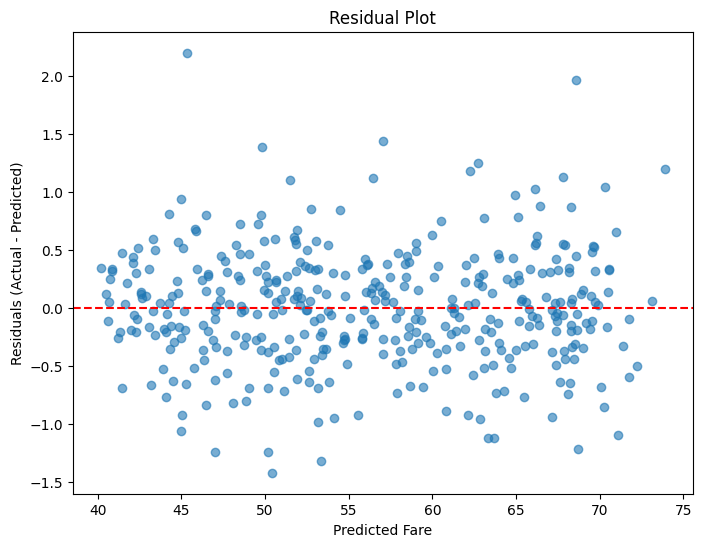

In [20]:
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Predict on training data
y_pred = model.predict(X)

# Calculate R² score and MSE
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")

# Residual plot (Actual vs Predicted)
residuals = y - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.6)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Fare')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

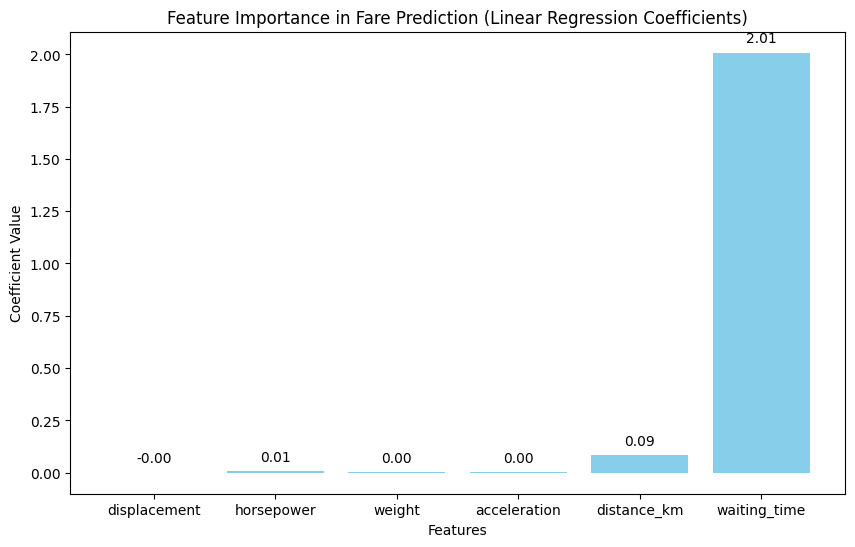

In [21]:
import numpy as np

# Features and their coefficients
features = ['displacement', 'horsepower', 'weight', 'acceleration', 'distance_km', 'waiting_time']
coefficients = model.coef_

# Plotting
plt.figure(figsize=(10,6))
bars = plt.bar(features, coefficients, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Feature Importance in Fare Prediction (Linear Regression Coefficients)')

# Annotate bars with coefficient values
for bar in bars:
    height = bar.get_height()
    plt.annotate(f'{height:.2f}',
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 5),  # 5 points vertical offset
                 textcoords='offset points',
                 ha='center', va='bottom')

plt.show()


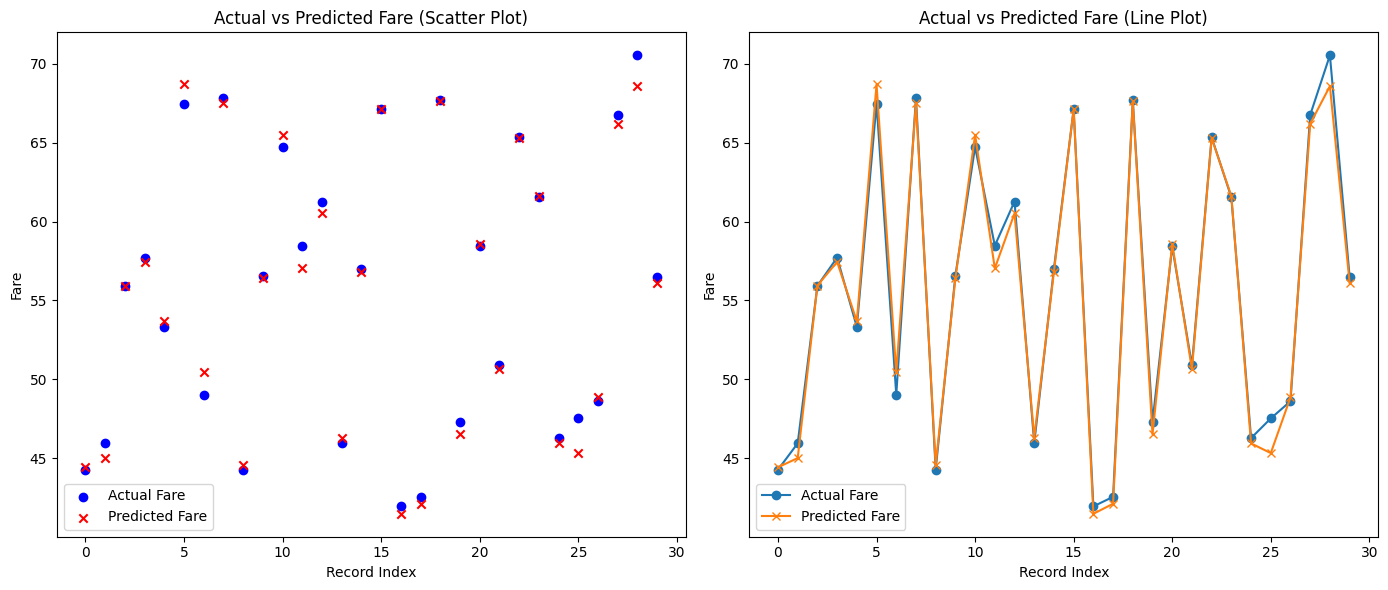

In [22]:
# Select first 30 records
n = 30
actual = y[:n].values
predicted = model.predict(X[:n])

plt.figure(figsize=(14,6))

# Scatter plot: Actual vs Predicted fares
plt.subplot(1, 2, 1)
plt.scatter(range(n), actual, color='blue', label='Actual Fare')
plt.scatter(range(n), predicted, color='red', label='Predicted Fare', marker='x')
plt.xlabel('Record Index')
plt.ylabel('Fare')
plt.title('Actual vs Predicted Fare (Scatter Plot)')
plt.legend()

# Line plot: Actual and Predicted fares
plt.subplot(1, 2, 2)
plt.plot(range(n), actual, label='Actual Fare', marker='o')
plt.plot(range(n), predicted, label='Predicted Fare', marker='x')
plt.xlabel('Record Index')
plt.ylabel('Fare')
plt.title('Actual vs Predicted Fare (Line Plot)')
plt.legend()

plt.tight_layout()
plt.show()
